<a href="https://colab.research.google.com/github/worldwidewebss/Redes-Complexas/blob/main/Atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inara Yasmin Donda Acosta
inarayasmin@usp.br
11811089

Exerício 1

In [ ]:

from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

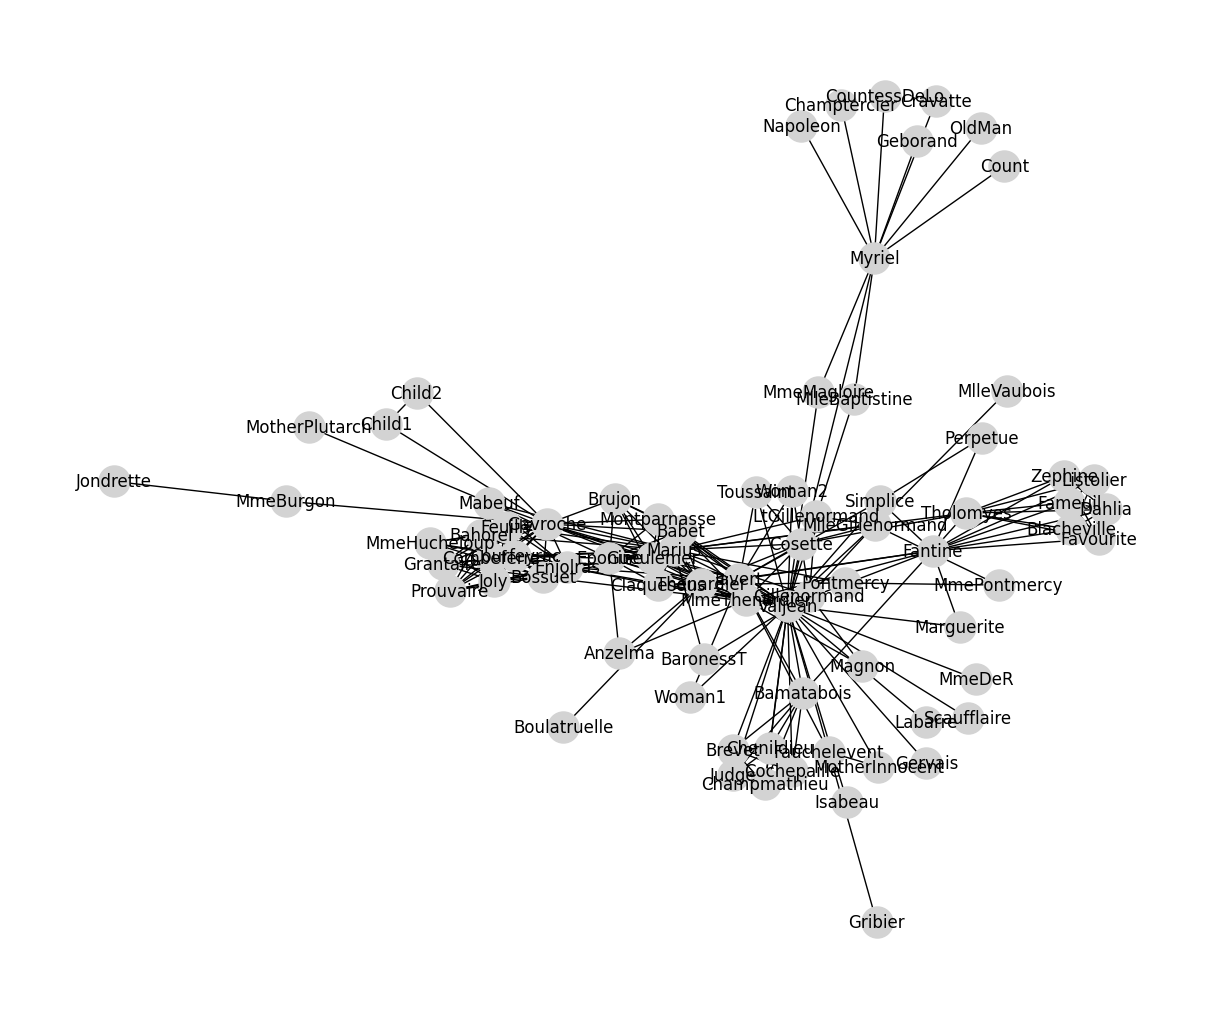

In [ ]:
#G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),))
G= nx.read_gml("/content/drive/MyDrive/USP - Física/7⁰ semestre/Redes Complexas/Redes Complexas/data/lesmis.gml") # Read the network
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [ ]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])


In [ ]:
G = nx.convert_node_labels_to_integers(G, first_label=0)


In [ ]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 77
Number of edges: 254


In [ ]:
vk = dict(G.degree()).values()
vk = np.array(vk)
print('Degree', vk)

Degree dict_values([10, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 36, 2, 1, 1, 1, 9, 7, 7, 7, 7, 7, 7, 15, 11, 16, 11, 17, 4, 8, 2, 4, 1, 2, 6, 6, 6, 6, 6, 3, 1, 11, 3, 3, 2, 1, 1, 2, 22, 7, 2, 7, 2, 1, 4, 19, 2, 11, 15, 11, 9, 11, 13, 12, 13, 12, 10, 1, 10, 10, 10, 9, 3, 2, 2, 7, 7])


In [ ]:
md = mean(vk)
print('Grau médio: ', md)

TypeError: ignored

In [ ]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

print('Primeiro momento de k:', momment(G,1))
print('Segundo momento de k:', momment(G,2))
print('Terceiro momento de k:', momment(G,3))
print('Quarto momento de k:', momment(G,4))
print('Variância de k:', np.var(vk))
print('Mediana de k:', np.median(vk))

In [ ]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [ ]:
ks, Pk = degree_distribution(G)


In [ ]:
plt.figure(figsize=(8,5))
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
#plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

Exercício 2

In [ ]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
g = nx.read_edgelist("/content/drive/MyDrive/USP - Física/7⁰ semestre/Redes Complexas/Redes Complexas/data/powergrid.txt", nodetype=int)
g.remove_edges_from(nx.selfloop_edges(g))

In [ ]:
N = len(g)
M = g.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 4941
Number of edges: 6594


In [ ]:
def complexity(g):
  vd = np.array(list(dict(g.degree()).values()))

  k2 = (1/len(vd)) * sum(vd**2)
  kmean = np.mean(vd)

#  print(" = ", kmean)
#  print(" = ", k2)
  print("/ = ", k2/kmean)

In [ ]:
complexity(g)


/ =  3.8712465878070974


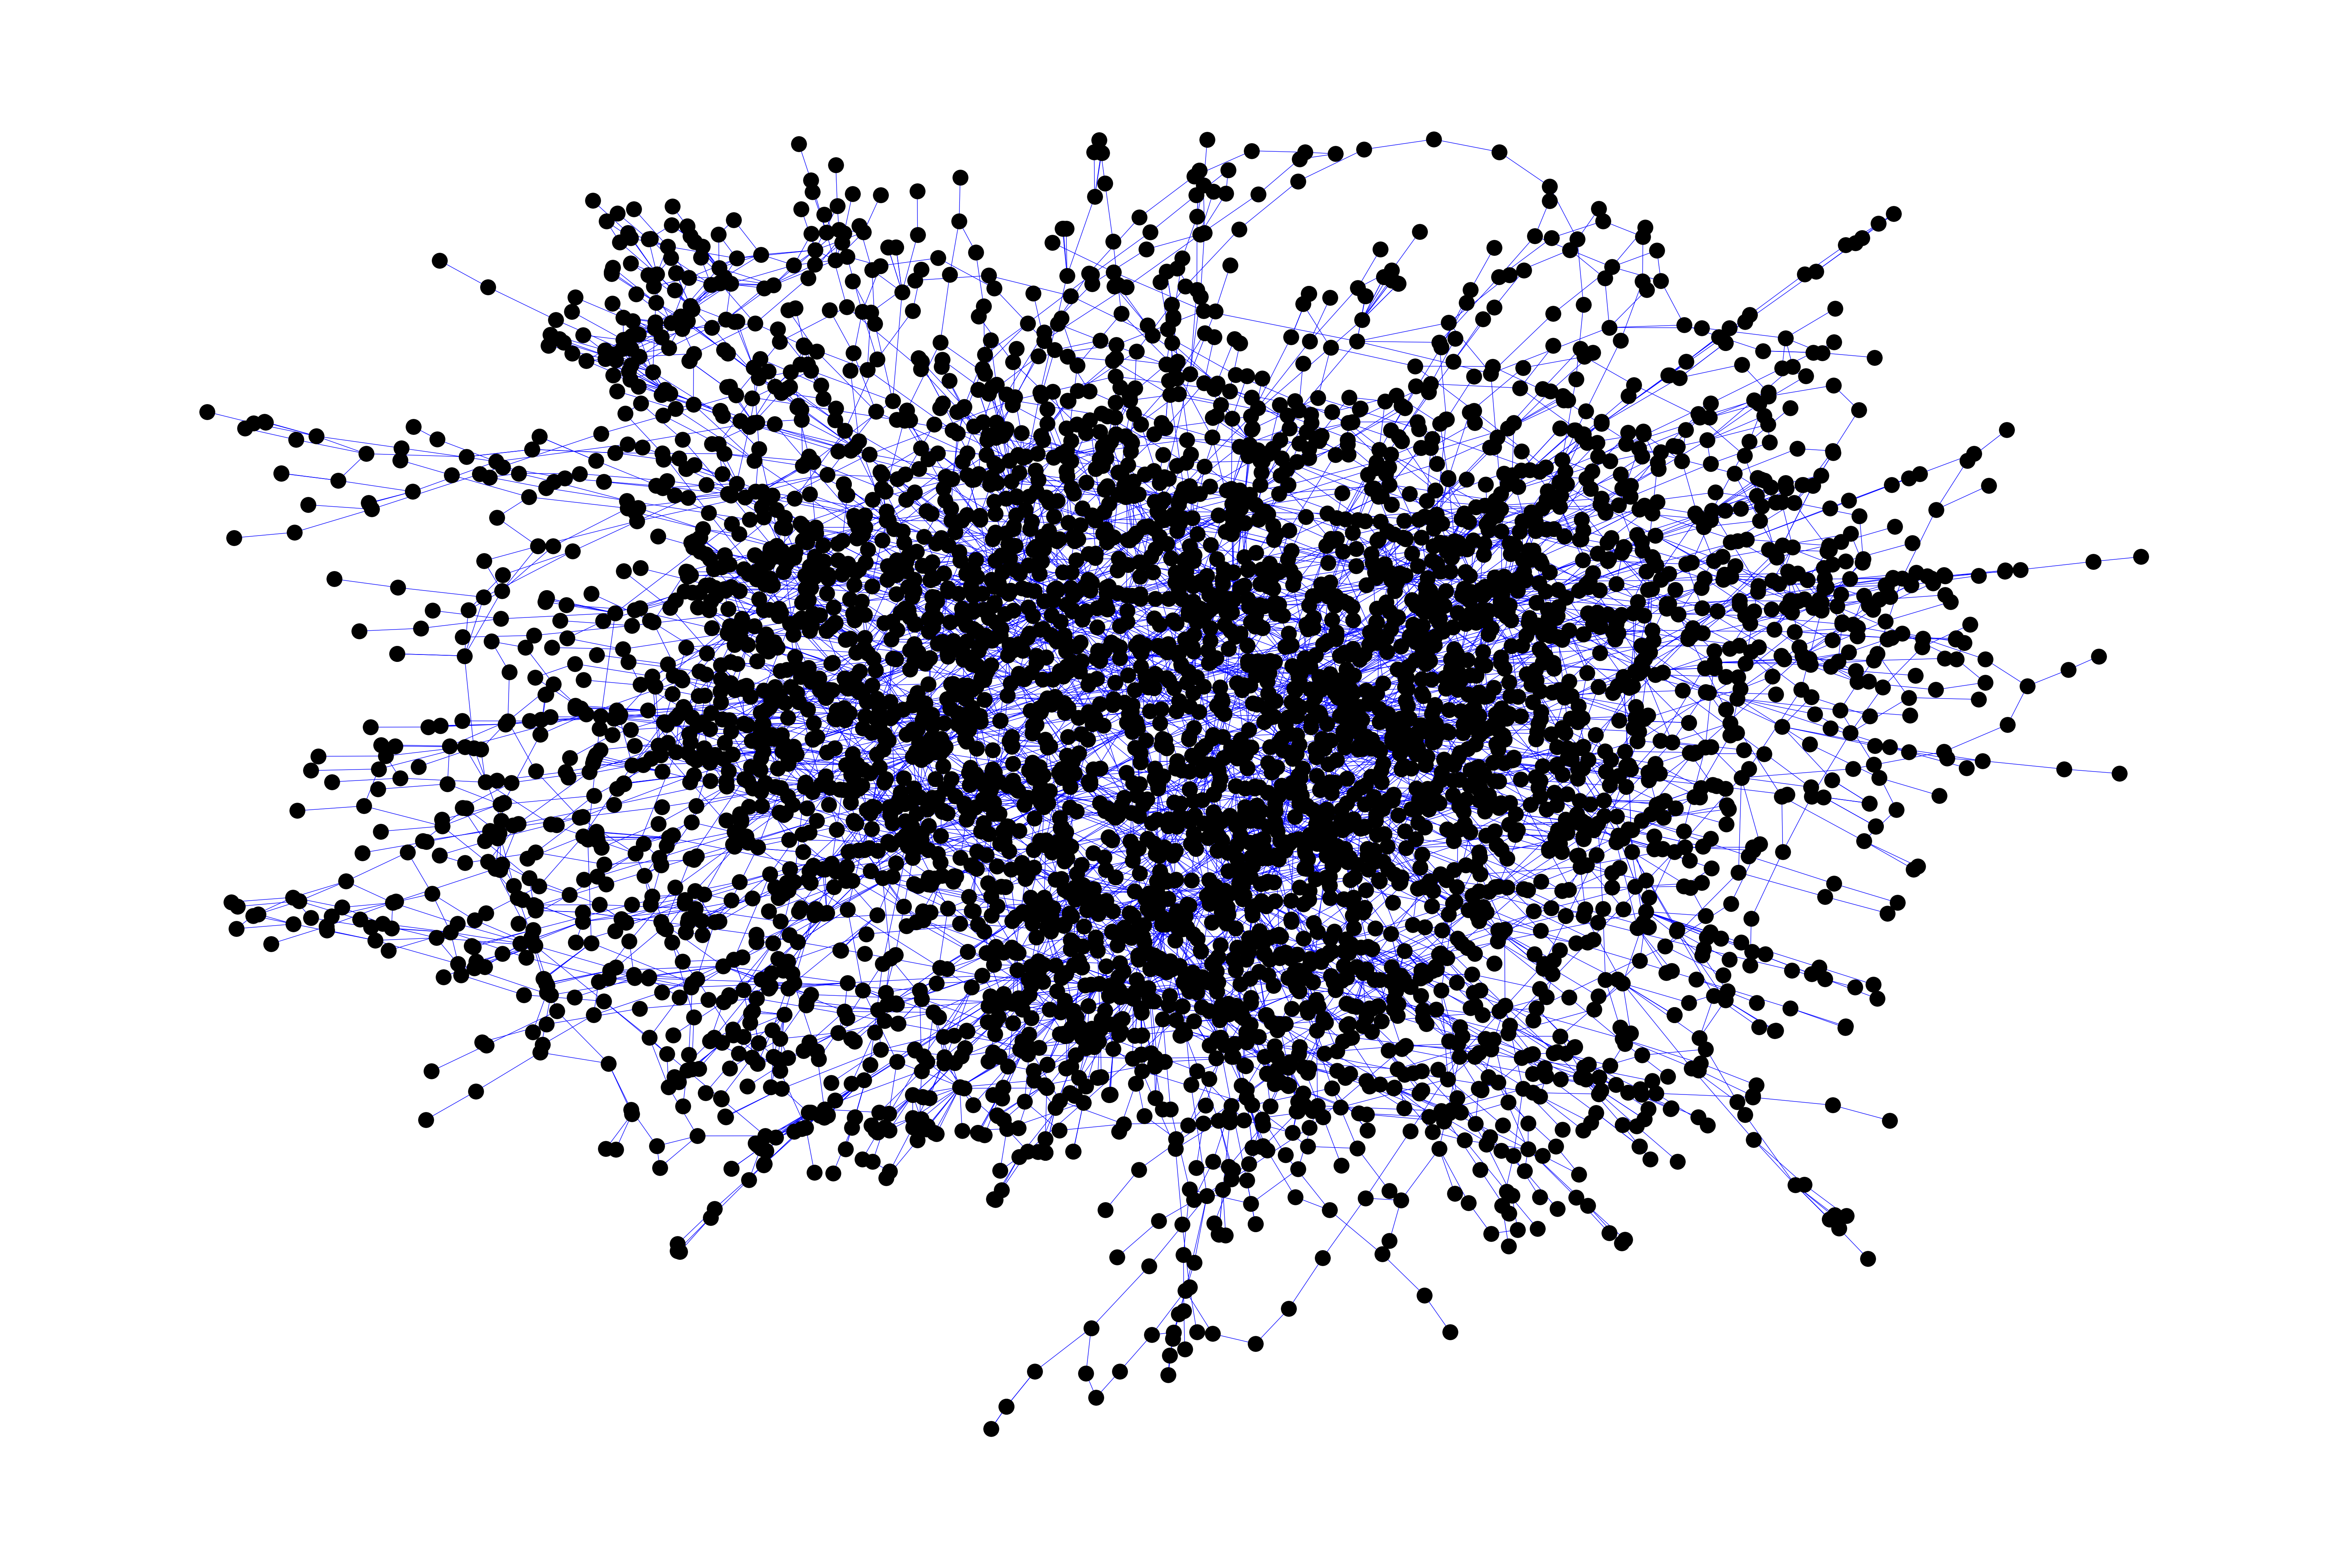

In [ ]:

plt.figure(figsize=(60, 40))
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color="black",font_color="red",edge_color="blue", font_size=22, node_size=800, with_labels = False)

In [ ]:
import numpy as np 
list = [2, 40, 2, 502, 177, 7, 9] 
media = np.mean(vk)
print(media)

2.66909532483303


In [ ]:
print(media/var)

0.8318420741213925


In [ ]:
v = np.zeros(len(g.nodes()))
k = 0
for i in g.nodes():
  v[k] = len(list(g.neighbors(i)))
  k += 1

print("Maximum connections of a node in the network = ", max(v))

# The nodes with more than 10 connections will be highlighted.

indices = np.where(v > 10)
# print(indices)
subset = list(indices)

print(list(subset))

NameError: ignored

Exercício 3

In [ ]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
#G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),))
G= G=nx.read_edgelist("/content/drive/MyDrive/USP - Física/7⁰ semestre/Redes Complexas/Redes Complexas/data/euroroad.txt", nodetype=int)
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [ ]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

In [ ]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [ ]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

In [ ]:
vk = dict(G.degree()).values()
vk = np.array(list(vk))
print('Degree', vk)

In [ ]:
md = mean(vk)
print('Grau médio: ', md)

In [ ]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

print('Primeiro momento de k:', momment(G,1))
print('Segundo momento de k:', momment(G,2))
print('Terceiro momento de k:', momment(G,3))
print('Variância de k:', np.var(vk))
print('Mediana de k:', np.median(vk))

In [ ]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [ ]:
ks, Pk = degree_distribution(G)

In [ ]:
plt.figure(figsize=(8,5))
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
#plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

In [ ]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

k1 = momment_of_degree_distribution(G,1)
print("Grau médio = ", mean(vk))
print("Primeiro momento da distribuição do grau = ", k1)

k2 = momment_of_degree_distribution(G,2)
print("Segundo momento da distribuição do grau = ", k2)

variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
print("Variância do grau = ", variance)

In [ ]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy(G)
print("Shannon Entropy = ", "%3.4f"%H)

In [ ]:
def normalized_shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H/math.log(len(G),2)

In [ ]:
H = normalized_shannon_entropy(G)
print("Normalized Shannon Entropy = ", "%3.4f"%H)

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.boxplot(vk, vert = 0)
ax.set_ylabel('Degree')
plt.show(True)

In [ ]:
CC = (nx.transitivity(G)) 
print("Transitivity = ","%3.4f"%CC)

In [ ]:
avc = nx.average_clustering(G)
print("Average clustering:", "%3.4f"%avc)

In [ ]:
vcc = []
for i in G.nodes():
    vcc.append(nx.clustering(G, i))
vcc= np.array(vcc)
print('Clustering of all nodes:', vcc)

In [ ]:
plt.figure()
plt.hist(vcc, bins  = 10, density=True)
plt.title("Distribution of the clustering coefficient", fontsize=20)
plt.ylabel("P(cc)", fontsize=15)
plt.xlabel("Clustering coefficient (cc)", fontsize=15)
#plt.grid(True)
plt.savefig('clustering.eps') #save the figure into a file
plt.show()

In [ ]:
#Average clustering for each degree k
ck = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(vcc[aux]) > 0):
        cm = mean(vcc[aux]) #average clustering among all the nodes with degree k
        ck.append(cm)
        ks.append(k)
plt.loglog(ks,ck,'bo')
plt.title("Clustering coefficient according to degree", fontsize=20)
plt.ylabel("cc(k)", fontsize=15)
plt.xlabel("k", fontsize=15)
#plt.grid(True)
plt.savefig('cck.eps')
plt.show(True)

Exercício 4 e 5

```

```



In [ ]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
#G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),))
#G= G=nx.read_edgelist("/content/drive/MyDrive/USP - Física/7⁰ semestre/Redes Complexas/Redes Complexas/data/usairport.txt", nodetype=int)
# If the data file has only two columns, use this:
G= G=nx.read_edgelist("/content/drive/MyDrive/USP - Física/7⁰ semestre/Redes Complexas/Redes Complexas/data/USairports.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [ ]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

In [ ]:
G = nx.convert_node_labels_to_integers(G, first_label=0)


In [ ]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

In [ ]:
vk = dict(G.degree()).values()
vk = np.array(list(vk))
print('Degree', vk)

In [ ]:
md = mean(vk)
print('Grau médio: ', md)

In [ ]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

print('Primeiro momento de k:', momment(G,1))
print('Segundo momento de k:', momment(G,2))
print('Terceiro momento de k:', momment(G,3))
print('Variância de k:', np.var(vk))
print('Mediana de k:', np.median(vk))

In [ ]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk
  

In [ ]:
ks, Pk = degree_distribution(G)


In [ ]:
plt.figure(figsize=(8,5))
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
#plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

In [ ]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

k1 = momment_of_degree_distribution(G,1)
print("Grau médio = ", mean(vk))
print("Primeiro momento da distribuição do grau = ", k1)

k2 = momment_of_degree_distribution(G,2)
print("Segundo momento da distribuição do grau = ", k2)

variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
print("Variância do grau = ", variance)

In [ ]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy(G)
print("Shannon Entropy = ", "%3.4f"%H)

In [ ]:
def normalized_shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H/math.log(len(G),2)

In [ ]:
H = normalized_shannon_entropy(G)
print("Normalized Shannon Entropy = ", "%3.4f"%H)

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.boxplot(vk, vert = 0)
ax.set_ylabel('Degree')
plt.show(True)

In [ ]:
CC = (nx.transitivity(G)) 
print("Transitivity = ","%3.4f"%CC)

In [ ]:
avc = nx.average_clustering(G)
print("Average clustering:", "%3.4f"%avc)

In [ ]:
vcc = []
for i in G.nodes():
    vcc.append(nx.clustering(G, i))
vcc= np.array(vcc)
print('Clustering of all nodes:', vcc)

In [ ]:
plt.figure()
plt.hist(vcc, bins  = 10, density=True)
plt.title("Distribution of the clustering coefficient", fontsize=20)
plt.ylabel("P(cc)", fontsize=15)
plt.xlabel("Clustering coefficient (cc)", fontsize=15)
#plt.grid(True)
plt.savefig('clustering.eps') #save the figure into a file
plt.show()

In [ ]:
#Average clustering for each degree k
ck = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(vcc[aux]) > 0):
        cm = mean(vcc[aux]) #average clustering among all the nodes with degree k
        ck.append(cm)
        ks.append(k)
plt.loglog(ks,ck,'bo')
plt.title("Clustering coefficient according to degree", fontsize=20)
plt.ylabel("cc(k)", fontsize=15)
plt.xlabel("k", fontsize=15)
#plt.grid(True)
plt.savefig('cck.eps')
plt.show(True)